<a href="https://colab.research.google.com/github/Manntouu/IAT360-FinalProj/blob/main/SMS_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Python Libraries (pip)

In [1]:
# install some Python packages with pip

%pip install numpy torch datasets transformers evaluate --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
%pip freeze | grep -E '^numpy|^torch|^datasets|^transformers|^evaluate'

datasets==3.1.0
evaluate==0.4.3
numpy==1.26.4
torch @ https://download.pytorch.org/whl/cu121_full/torch-2.5.1%2Bcu121-cp310-cp310-linux_x86_64.whl
torchaudio @ https://download.pytorch.org/whl/cu121/torchaudio-2.5.1%2Bcu121-cp310-cp310-linux_x86_64.whl
torchsummary==1.5.1
torchvision @ https://download.pytorch.org/whl/cu121/torchvision-0.20.1%2Bcu121-cp310-cp310-linux_x86_64.whl
transformers==4.46.3


# Create Dataset for Fine-tuning BERT

## Load the SMS Spam Dataset

In [2]:
from datasets import load_dataset
import pandas as pd
# source: https://huggingface.co/datasets/Deysi/spam-detection-dataset
raw_dataset = load_dataset('Deysi/spam-detection-dataset')
raw_dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/581 [00:00<?, ?B/s]

(…)-00000-of-00001-daf190ce720b3dbb.parquet:   0%|          | 0.00/1.92M [00:00<?, ?B/s]

(…)-00000-of-00001-fa9b3e8ade89a333.parquet:   0%|          | 0.00/663k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8175 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2725 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8175
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2725
    })
})

In [ ]:
test_df = raw_dataset['test'].to_pandas()

# Display the first 5 entries in the training set
print(test_df.head())

                                                text     label
0   Deezer.com 10,406,168 Artist DB\n\nWe have sc...  not_spam
1  🚨 ATTENTION ALL USERS! 🚨\n\n🆘 Are you looking ...      spam
2  I'm working on a stats project to test some of...  not_spam
3  [[Sorry, I cannot generate inappropriate or sp...      spam
4  L@@k at these Unbelievable diet pills that can...      spam


In [3]:
from datasets import Dataset, DatasetDict
# Add new 40 entries to training set
new_entries = [
    {"text":"machi machi's Fresh Tropical Yakult Series are available at all stores today! Stay fresh, stay healthy with Yakult!\n\nTo unsub txt STOP",  "label":"spam"},
    {"text":"Hello, I hope you're having a wonderful day! \n\nWe've noticed that your background and resume have been recommended by online recruitment agencies. We'd like to offer you a part-time job. All you need is a smartphone or computer. Daily pay ranges from $300 to $3,000 USD, up to $20K+ USD per month. All salaries are paid on the same day. Available for the next 24 hours only. If you're interested in taking part, please contact us via WhatsApp: +15028344740\n\n(Note: You must be 24 years old or older)",  "label":"spam"},
    {"text":"Canadian Customs: You have a  parcel being cleared, due to the detection of an invalid zip code address, the parcel can not be cleared, the parcel is temporarily detained, please confirm the zip code address information in the link within 24 hours. \n\nhttps://canpost-zsdfe.xyz/iSSCkwXk\n\n(Please reply with a Y, then exit the text message and open it again to activate the link, or copy the link into your Safari browser and open it)",  "label":"spam"},
    {"text":"Canada Post: Your package has arrived at the warehouse and has been suspended due to a missing home number in the package and cannot be delivered. Please update: \n\nhttps://canadaspostn-postecanadae.top/c/ca\n\n(Please reply Y, then exit the text message, reopen the text message activation link, or copy the link to Safari browser to open it)",  "label":"spam"},
    {"text":"Hi, it's Nikita from the Rogers  store in the Mall. Just so you know, whenever you're ready for a new phone our store is here to help. Are you happy with your phone or would you like to explore your upgrade options? \n\nFor my store details or to opt out: https://www.rogers.com/consumer/unsubscribe",  "label":"spam"},
    {"text":"Hey who ever this is my names charity and i have nothing to do with any of these msgs you have recieved. My apologies. Congratulations on your sobriety.",  "label":"spam"},
    {"text":"Hello its me! I missed your call how are you doing?",  "label":"spam"},
    {"text":"I haven’t heard from you for a long time? Please text me back when you are free.",  "label":"spam"},
    {"text":"BIG BLACK FRIDAY SAVING TODAY! Connect to www. blackfridaysaving.com to claim your rewards.",  "label":"spam"},
    {"text":"Canada Post, there is a issue with your package,  please click this link to pay the duty: WWW. FEDEEX.com",  "label":"spam"},
    {"text":"I am Rose, do you remember me Anna?", "label":"spam"},
{"text":"She Used To Laugh,But One Of These And She’ll Beg For More Herbwell.com/kl89s", "label":"spam"},
{"text":"THE USPS package has arrived at warehouse and can not be delivered due to incomplete address. Please confirm address in the link. \n\nhttps://usps.comfirm -us.com", "label":"spam"},
{"text":"This skin care lotion by Jay Lo is AWESOME", "label":"spam"},
{"text":"INTERAC e-Transfer: Reminder -you have a transfer that hasn’t’t been deposited. See:https://accept-e-transfer-online-secure.com/", "label":"spam"},
{"text":"Hi are you busy with work? Please reply when you see the information", "label":"spam"},
{"text":"Hello, I found the number when I was sorting out the address book, but I didn’t have the name for this number. Please call me back if you see the message.", "label":"spam"},
{"text":"Get out of debt FAST. You are PRE-APPROVED for up to $4000. Take action today:ivpsy..Lo89sJVYT", "label":"spam"},
{"text":"WINNER ANNOUNCEMENT:Well done! Congrats on winning the prize, claim now:muwu8.xyv/0Hkuim98L", "label":"spam"},
{"text":"November bill is paid. Thanks, Here’s a little gift for you: u8Ilo.xyv/YhuW8kil", "label":"spam"},
{"text":"Rogers Msg: You've used 100% of your high speed data. No data overage charges will apply, and you can continue to use data at a reduced speed.","label":"not_spam"},
{"text":"Rogers Msg: You have used 90% of your high speed data, which will reset on Nov 03 2024. No data overage charges will apply with your plan.  Once 100% is used, you can keep going at a reduced speed or add a Speed Pass to return to high speed.","label":"not_spam"},
{"text":"Rogers Msg: Enjoy more high speed data by upgrading your pla n. Visit www.rogers.com/priceplanchange\n\nNot ready to switch ? Keep going at high speed data by adding a Speed Pass to th is month’s bill. \n\nReply 'A' to add 3GB for $20\n\nReply 'B' to  add 10GB for $40\n\nTo stop receiving these messages, reply 'OPTOUT'.","label":"not_spam"},
{"text":" 📳 Be ready outside. Robin is arriving soon in the black Kia Carnival","label":"not_spam"},
{"text":"Available balance in Scotiabank account ending 9999 is below $300. To avoid charges, add funds or manage spending before balance reaches $0, or charges may apply.","label":"not_spam"},
{"text":"Hi, it's Fido: Heads up! Your extra hour of data session has ended. You're now using data from your plan. Want to start another data session, on us? Open the My Account app to use any remaining sessions.","label":"not_spam"},
{"text":"Do u know how to make an appointment w family doctor?","label":"not_spam"},
{"text":"Really?","label":"not_spam"},
{"text":"Amazon: Your code is 757334. Don't share it. If you didn't request it, deny here https://amazon.com/a/c/r/9wGQusAOEZl1XD9kU0Y","label":"not_spam"},
{"text":"Hi. We are pleased to inform you that your box order with tracking ID FOAOT1020014274 has been successfully delivered.","label":"not_spam"},
{"text":"Your order was dropped off. Please refer to this photo your Dasher provided to see where it was left.","label":"not_spam"},
{"text":"Donair Town has confirmed your order from DoorDash. We'll let you know when your Dasher has picked up your order!","label":"not_spam"},
{"text":"FedEx: fedex.com/t/400676664/en_CA, 3 pieces, scheduled for delivery tomorrow 08-01 by 22:00. Signature at address req'd. Reply HELP for help. Reply STOP to cancel.","label":"not_spam"},
{"text":"Apple Store: Today's the day. Items in order W14133056 should be delivered today. C'est le jour J. Les articles de la commande W14133056 devraient être livrés aujourd'hui. For more info/Pour en savoir plus :","label":"not_spam"},
{"text":"Hi Carolyn, our technician will see you between 2 pm and 4 pm today. To reschedule or cancel, send RES to 5555.Hi Carolyn, our technician will see you between 2 pm and 4 pm today. To reschedule or cancel, send RES to 5555.","label":"not_spam"},
{"text":"Hey, let me know if you need anything while you’re sick. I can drop off soup or run errands for you.","label":"not_spam"},
{"text":"Looks like it’s pouring out there. Do we still want to meet at the park, or should go to campus?","label":"not_spam"},
{"text":"Hey, don’t forget your dentist appointment tomorrow at 9:30 AM..","label":"not_spam"},
{"text":"Can you send over the latest draft before noon? I need to review it before the meeting at 3.","label":"not_spam"},
{"text":"❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️❤️","label":"not_spam"},
]

# Add new entries one by one
merged_train_dataset = raw_dataset["train"]
for entry in new_entries:
    merged_train_dataset = merged_train_dataset.add_item(entry)

# Add new 20 entries to test set
new_entries = [
    {"text": "Rogers svc msg: We've received approval to transfer your wireless number to another provider. Didn't authorize this? Call us now at 1-877-327-8503", "label":"spam"},
    {"text":"LAST CHANCE: 25% OFF SITEWIDE | Don't let the sun set on this spooky good deal! Link: https://sms.inkbx.ink/d2mFrP",  "label":"spam"},
    {"text":"ICYMI: 30% OFF Everything | Save on prezzies for everyone on your list *or* a treat (or three) for yourself! Link - https://sms.inkbx.ink/bJrE0E",  "label":"spam"},
    {"text":"We miss cooking with you. Reactivate now & get up to 50% OFF your first 4 Goodfood orders: https://bit.ly/40xxV9p\n\nText STOP to unsub from SMS.",  "label":"spam"},
    {"text":"Give Goodfood another go! Get up to 66% OFF across your next 4 orders. Hurry! https://bit.ly/3QCDcXb Text STOP to unsub from SMS.",  "label":"spam"},
    {"text":"Lancome: TODAY ONLY ✨ Enjoy 50% OFF Absolue Rich Cream! \n\nPlus, Get FREE 500ml Tonique Confort with orders $300+. Don't miss the Best Absolue offer of the year! Hurry! Offer ends tonight! Shop now: https://lancomeca.attn.tv/aZrc5rwiZmDK STOP to cancel.",  "label":"spam"},
    {"text":"Lancome: 3 DAYS LEFT! Treat yourself this Single's Day with up to 50% OFF all skincare and luxurious gifts on orders $300+ and $500+. Hurry! Offer ending soon. Shop now: https://lancomeca.attn.tv/amADsqVWq04B \n\n STOP to cancel.",  "label":"spam"},
    {"text":"Lancome: This weekend only, get our limited edition Holiday Beauty Box for only $175! No qualifying purchase necessary (Value of $800). Plus, today is your LAST CHANCE to enjoy our Fragrance Week offers! Don't miss out! Shop Now: https://lancomeca.attn.tv/a-HDNLdCNOg2 \n\n STOP to cancel.",  "label":"spam"},
    {"text":"Hey I'm an Samantha from Robert Walters, That are several opening role position. May  I send you the  details?",  "label":"spam"},
    {"text":"machi back to school event on 10.05&06!Receive scratch cards with purchase of any drink!Guaranteed wining a variety of exciting machi gifts! \n\nTo unsub txt STOP",  "label":"spam"},
    {"text":"Rogers msg: Hello, treat yourself to a new phone with this exclusive phone upgrade offer as a Rogers Preferred Program member. \n\nUpgrade to iPhone 15 128GB and save up to $360 over 24 months with financing.\n\nPlus, get an exclusive 150GB Rogers Infinite plan with speeds up to 1 Gbps, reduced speeds thereafter, for $90/mo. (plan eligible for program discount). \n\nCall 1-844-882-0593 or visit us in-store. \n\nThank you for choosing Rogers. Questions? Visit rogers.com/contactus\n\nA plan change and remaining phone balance payment may be required. Reply unsubscribe to opt-out of Rogers txt msgs.","label":"not_spam"},
{"text":"CRA Multi-Factor Authentication (MFA): Your CRA One-Time Passcode is 999999","label":"not_spam"},
{"text":"Your one time passcode is 98412.","label":"not_spam"},
{"text":"Please let me know if you need directions or I can come meet you if you are already at the hospital.","label":"not_spam"},
{"text":"Thank you for confirming! Please have a great weekend and we will see you next Tuesday!","label":"not_spam"},
{"text":"Hi！I hope you are having a wonderful long weekend! This is a friendly text reminder that your study appointment is booked for tomorrow at 11:15am. Please kindly email or message me at this number when you have arrived at the gate. Thank you again for your time and participation! We look forward to see you tomorrow. Regards,","label":"not_spam"},
{"text":"Your current eStatement for account ending in 0000 is available. Sign on to CIBC Banking.","label":"not_spam"},
{"text":"A minimum payment of $10.00 for your card ending in 9999 is due October  1,  2024. If you've already made a payment, please ignore this message. Thank you for banking with RBC.","label":"not_spam"},
{"text":"Do not share this code with anyone. CIBC will never call you for this. Enter code: 592428 for JPY 4400 at &#65335;&#65349;&#65346;&#65355;&#65349;&#65364; on card ending 9999. oj8q54qM2Vm","label":"not_spam"},
{"text":"Bell msg: For tips & limitations when calling 9-1-1 from your mobile phone (where 9-1-1 is available) see bell.ca/911 ( bell.ca/about-us )","label":"not_spam"},

]

# Add new entries one by one
merged_test_dataset = raw_dataset["test"]
for entry in new_entries:
    merged_test_dataset = merged_test_dataset.add_item(entry)

dataset = DatasetDict({
    'train': merged_train_dataset,
    'test': merged_test_dataset  # Assuming no changes to the test split
})
# Check the last few entries to confirm
dataset


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8215
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2745
    })
})

The raw dataset splits its data 25/75. It has 10960 data entries in total

## Let's create the train, validation, test sets

Split dataset into train 70%, validation 15%, test 15%

In [4]:
from datasets import DatasetDict, concatenate_datasets


full_dataset = concatenate_datasets([dataset['train'], dataset['test']])


# Split the full dataset into 70% training and 30% temp (validation + test placeholder)
train_val_test_split = full_dataset.train_test_split(test_size=0.3, seed=42)


# Split the temp set (30%) into 50% validation and 50% test
val_test_split = train_val_test_split['test'].train_test_split(test_size=0.5, seed=42)


dataset = DatasetDict({
   'train': train_val_test_split['train'],
   'val': val_test_split['train'],
   'test': val_test_split['test']
})


dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 7672
    })
    val: Dataset({
        features: ['text', 'label'],
        num_rows: 1644
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1644
    })
})

Visualize Class Distribution and Text Length Distribution in the training set

<ipython-input-5-2e3d2600ee1b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x='label', data=train_df, palette='Reds')
<ipython-input-5-2e3d2600ee1b>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Not Spam', 'Spam'])
<ipython-input-5-2e3d2600ee1b>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], x='label', y='text_length', data=train_df, palette='Reds')
<ipython-input-5-2e3d2600ee1b>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Not Spa

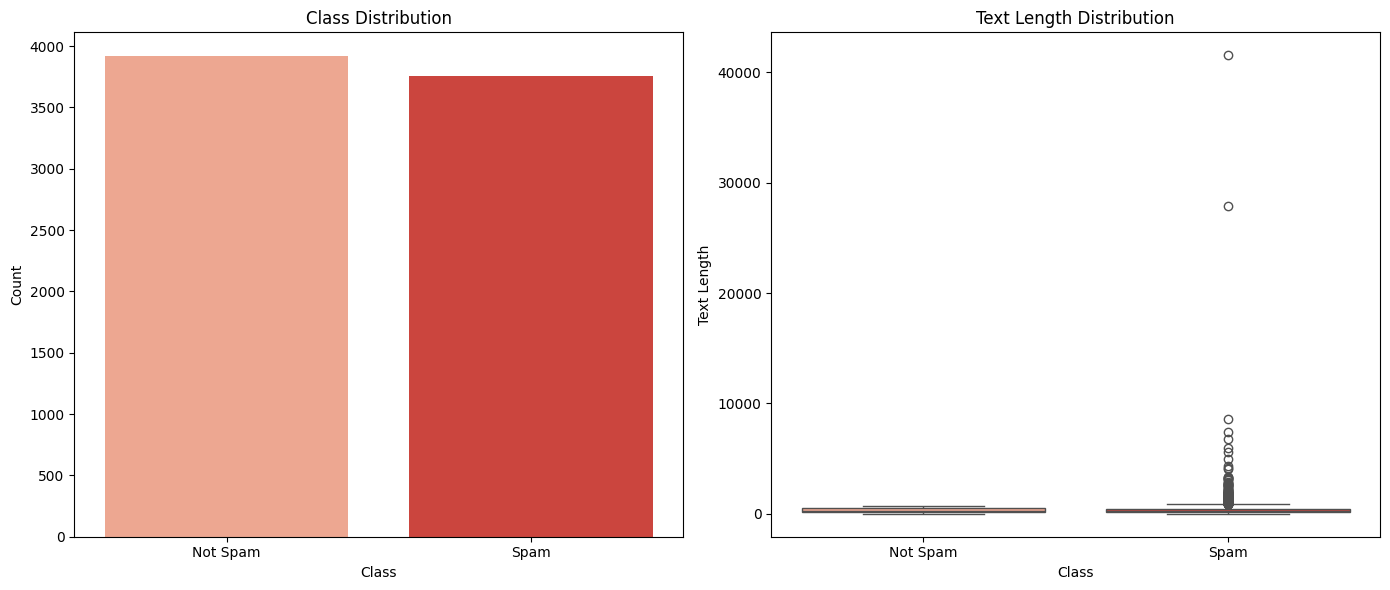

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

train_df = dataset['train'].to_pandas()

train_df['text_length'] = train_df['text'].apply(len)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Plot class distribution
sns.countplot(ax=axes[0], x='label', data=train_df, palette='Reds')
axes[0].set_title('Class Distribution')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Not Spam', 'Spam'])

# Plot text length distribution
sns.boxplot(ax=axes[1], x='label', y='text_length', data=train_df, palette='Reds')
axes[1].set_title('Text Length Distribution')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Text Length')
axes[1].set_xticklabels(['Not Spam', 'Spam'])


plt.tight_layout()
plt.show()

## We start by tokenizing our dataset with the BERT's Fast Tokenizer

In [ ]:
# import the pretrained faster tokenizer from huggingface
# source: (https://huggingface.co/distilbert-base-uncased)

from transformers import AutoTokenizer

checkpoint = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(checkpoint, use_fast=True)
tokenizer

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [ ]:
# tokenize the text in batches with truncation and padding based on BERT requirements

def tokenization(example):
    return tokenizer(example['text'], truncation=True, padding=True)

tokenized_dataset = dataset.map(tokenization, batched=True, remove_columns=['text'])
tokenized_dataset

Map:   0%|          | 0/7672 [00:00<?, ? examples/s]

Map:   0%|          | 0/1644 [00:00<?, ? examples/s]

Map:   0%|          | 0/1644 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['label', 'input_ids', 'attention_mask'],
        num_rows: 7672
    })
    val: Dataset({
        features: ['label', 'input_ids', 'attention_mask'],
        num_rows: 1644
    })
    test: Dataset({
        features: ['label', 'input_ids', 'attention_mask'],
        num_rows: 1644
    })
})

# Setup Training Metrics (Accuracy, F1)

In [ ]:
import evaluate
import numpy as np

# we setup the training to evaluate the accuracy, f1 scores, precision, and recall

accuracy_metric = evaluate.load('accuracy')
f1_metric = evaluate.load('f1')
precision_metric = evaluate.load('precision')
recall_metric = evaluate.load('recall')

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
    f1 = f1_metric.compute(predictions=predictions, references=labels)
    precision = precision_metric.compute(predictions=predictions, references=labels)
    recall = recall_metric.compute(predictions=predictions, references=labels)
    return {**accuracy, **f1,**precision, **recall}

# Setup Training Configurations

In [ ]:
import os
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

# Load the pretrained DistilBERT model from the Hugging Face
# source: (https://huggingface.co/distilbert-base-uncased)
checkpoint = 'distilbert-base-uncased'
num_labels = 2
id2label = {0:'not_spam',1:'spam'}
label2id = {'not_spam':0,'spam':1}
def map_labels(example):
   example['label'] = label2id[example['label']]
   return example
tokenized_dataset = tokenized_dataset.map(map_labels)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=num_labels, id2label=id2label, label2id=label2id)
# map string labels to binary labels
training_args = TrainingArguments(
    seed=42,
    output_dir = './results',
    num_train_epochs = 1,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy='steps',
    load_best_model_at_end=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['val'],
    compute_metrics=compute_metrics,
)

# disable wandb logging (a v4 huggingface artifact)
os.environ['WANDB_DISABLED']= "true"

Map:   0%|          | 0/7672 [00:00<?, ? examples/s]

Map:   0%|          | 0/1644 [00:00<?, ? examples/s]

Map:   0%|          | 0/1644 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


# Evaluate UnFine-Tuned BERT on Test Set for a Baseline Metric


In [ ]:
# evaluate unfine-tuned model with test set

trainer.evaluate(tokenized_dataset['test'])

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


{'eval_loss': 0.6882182359695435,
 'eval_model_preparation_time': 0.0027,
 'eval_accuracy': 0.5060827250608273,
 'eval_f1': 0.014563106796116505,
 'eval_precision': 1.0,
 'eval_recall': 0.007334963325183374,
 'eval_runtime': 26.9753,
 'eval_samples_per_second': 60.945,
 'eval_steps_per_second': 3.818}

Without fine-tuning BERT, our model currently has around **50.6% Accuracy (eval_accuracy)**, **1.6% F1 (eval_f1)**, **100% Percision (eval_precision)**, and **0.7% Recall (eval_recall)** which is pretty bad due to the test dataset having around 50% spam and 50% non-spam messages.

# Fine-Tune BERT with Our Dataset

In [ ]:
# fine-tune BERT with the our dataset

trainer.train()

Step,Training Loss,Validation Loss


TrainOutput(global_step=480, training_loss=0.03212632735570272, metrics={'train_runtime': 357.6155, 'train_samples_per_second': 21.453, 'train_steps_per_second': 1.342, 'total_flos': 1016289882488832.0, 'train_loss': 0.03212632735570272, 'epoch': 1.0})

In [ ]:
trainer.evaluate(tokenized_dataset['test'])

{'eval_loss': 0.00450570834800601,
 'eval_model_preparation_time': 0.0027,
 'eval_accuracy': 0.9987834549878345,
 'eval_f1': 0.9987760097919217,
 'eval_precision': 1.0,
 'eval_recall': 0.9975550122249389,
 'eval_runtime': 25.8799,
 'eval_samples_per_second': 63.524,
 'eval_steps_per_second': 3.98,
 'epoch': 1.0}

In [ ]:

# Save the fine-tuned model to a directory
output_dir = "./fine_tuned_model"
trainer.save_model(output_dir)
tokenizer.save_pretrained(output_dir)


('./fine_tuned_model/tokenizer_config.json',
 './fine_tuned_model/special_tokens_map.json',
 './fine_tuned_model/vocab.txt',
 './fine_tuned_model/added_tokens.json',
 './fine_tuned_model/tokenizer.json')

# See some predictions from test set!

In [ ]:
# Get the predictions on the test set
test_dataset = tokenized_dataset["test"]
raw_test_texts = raw_dataset["test"]["text"]
predictions = trainer.predict(test_dataset)

In [ ]:

import numpy as np
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids


In [ ]:
# Compare true and predicted labels
tokenized_texts = tokenized_dataset["test"]
results = []
for i, text in enumerate(raw_test_texts):
  if i < len(true_labels) and i < len(predicted_labels):
    results.append({
        "text": text,
        "true_label": true_labels[i],
        "predicted_label": predicted_labels[i],
        "is_correct": true_labels[i] == predicted_labels[i]
    })

In [ ]:
import pandas as pd
results_df = pd.DataFrame(results)
# Get correct and incorrect examples
correct_samples = results_df[results_df["is_correct"] == True].head(5)
incorrect_samples = results_df[results_df["is_correct"] == False].head(5)

In [ ]:
correct_count = results_df[results_df["is_correct"] == True].shape[0]
incorrect_count = results_df[results_df["is_correct"] == False].shape[0]

print(f"Correct Predictions: {correct_count}")
print(f"Incorrect Predictions: {incorrect_count}")

Correct Predictions: 1642
Incorrect Predictions: 2


In [ ]:
print("Correct Examples:")
print(correct_samples)

print("\nIncorrect Examples:")
print(incorrect_samples)


Correct Examples:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

# Change Hyperparameter and Evaluate New Model

In [ ]:
training_args = TrainingArguments(
    seed=42,
    output_dir = './results',
    num_train_epochs = 1,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    evaluation_strategy='steps',
    load_best_model_at_end=True,
)

new_trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['val'],
    compute_metrics=compute_metrics,
)

# disable wandb logging (a v4 huggingface artifact)
os.environ['WANDB_DISABLED']= "true"

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
new_trainer.train()

Step,Training Loss,Validation Loss


TrainOutput(global_step=240, training_loss=0.009216424822807313, metrics={'train_runtime': 354.3417, 'train_samples_per_second': 21.651, 'train_steps_per_second': 0.677, 'total_flos': 1016289882488832.0, 'train_loss': 0.009216424822807313, 'epoch': 1.0})

In [ ]:
new_eval_results = new_trainer.evaluate(tokenized_dataset['test'])

In [ ]:
new_eval_results

{'eval_loss': 0.004161291290074587,
 'eval_accuracy': 0.9981751824817519,
 'eval_f1': 0.998165137614679,
 'eval_precision': 0.9987760097919217,
 'eval_recall': 0.9975550122249389,
 'eval_runtime': 25.7861,
 'eval_samples_per_second': 63.755,
 'eval_steps_per_second': 2.017,
 'epoch': 1.0}

In [ ]:
# Save the updated model
model_save_path = './fine_tuned_model/updated_model'
new_trainer.save_model(model_save_path)

# See some result from our new model

In [ ]:
# Get the predictions on the test set
new_predictions = new_trainer.predict(test_dataset)

In [ ]:
import numpy as np
new_predicted_labels = np.argmax(new_predictions.predictions, axis=1)
new_true_labels = new_predictions.label_ids

In [ ]:
# Compare true and predicted labels
tokenized_texts = tokenized_dataset["test"]
new_results = []
for i, text in enumerate(raw_test_texts):
  if i < len(true_labels) and i < len(predicted_labels):
    new_results.append({
        "text": text,
        "true_label": true_labels[i],
        "predicted_label": predicted_labels[i],
        "is_correct": true_labels[i] == predicted_labels[i]
    })

In [ ]:

import pandas as pd
new_results_df = pd.DataFrame(new_results)

correct_samples = new_results_df[new_results_df["is_correct"] == True].head(5)  # First 5 correct
incorrect_samples = new_results_df[new_results_df["is_correct"] == False].head(5)  # First 5 incorrect

In [ ]:

correct_count = new_results_df[new_results_df["is_correct"] == True].shape[0]
incorrect_count = new_results_df[new_results_df["is_correct"] == False].shape[0]

print(f"Correct Predictions: {correct_count}")
print(f"Incorrect Predictions: {incorrect_count}")

Correct Predictions: 1642
Incorrect Predictions: 2


In [ ]:
print("Correct Examples:")
print(correct_samples)

print("\nIncorrect Examples:")
print(incorrect_samples)

Correct Examples:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

# Visualize the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

def compute_confusion_matrix(trainer, dataset):
    predictions = trainer.predict(dataset)
    preds = np.argmax(predictions.predictions, axis=1)
    labels = predictions.label_ids

    # Compute confusion matrix
    cm = confusion_matrix(labels, preds)
    return cm, preds, labels

# Compute confusion matrix
print("Generating confusion matrix for the original model...")
cm_original, preds_original, labels_original = compute_confusion_matrix(trainer, tokenized_dataset['test'])


print("Generating confusion matrix for the updated model...")
cm_updated, preds_updated, labels_updated = compute_confusion_matrix(new_trainer, tokenized_dataset['test'])


Generating confusion matrix for the original model...


Generating confusion matrix for the updated model...


Confusion Matrix for Original Model


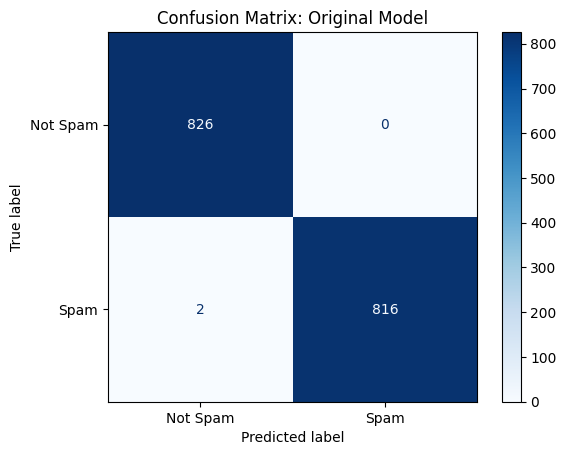

Confusion Matrix for Updated Model


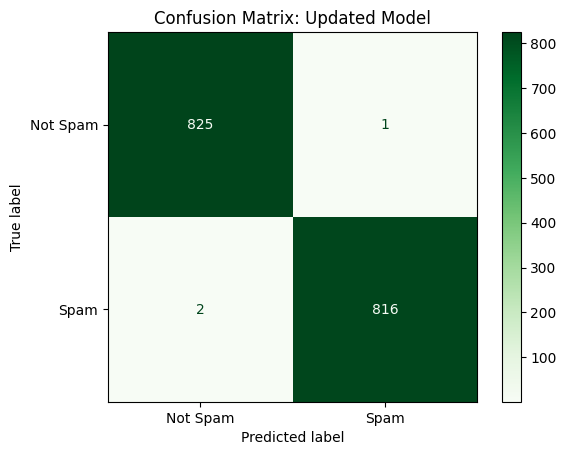

In [ ]:
import matplotlib.pyplot as plt

# Display confusion matrix for the original model
print("Confusion Matrix for Original Model")
disp_original = ConfusionMatrixDisplay(confusion_matrix=cm_original, display_labels=['Not Spam', 'Spam'])
disp_original.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: Original Model")
plt.show()

# Display confusion matrix for the updated model
print("Confusion Matrix for Updated Model")
disp_updated = ConfusionMatrixDisplay(confusion_matrix=cm_updated, display_labels=['Not Spam', 'Spam'])
disp_updated.plot(cmap='Greens', values_format='d')
plt.title("Confusion Matrix: Updated Model")
plt.show()
